In [1]:
from neuralnet import load_config, load_data, get_k_fold_ind, Neuralnetwork, train, test, load_model

import matplotlib.pyplot as plt
import numpy as np

# Load the configuration.
config = load_config("plot_config.yaml")
print(config)

{'layer_specs': [784, 50, 10], 'activation': 'tanh', 'learning_rate': 0.0001, 'batch_size': 1000, 'epochs': 100, 'early_stop': True, 'early_stop_epoch': 5, 'L2_penalty': 0, 'momentum': True, 'momentum_gamma': 0.9}


# Part C
 Use momentum gamma of 0.9, no weight decay
 Describe training procedure
 Try different learning rates
 Describe training process
 
 Plot training/valid loss and accuracy
 Report test accuracy and lost
 

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 Early stop on epoch 108
Best epoch: 102
Test Accuracy: 0.8126, Test Loss: 0.5367401608168768


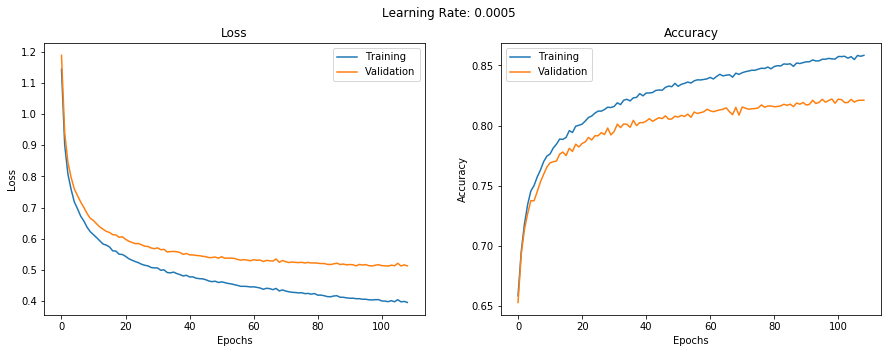

In [2]:
config["learning_rate"] = 0.0005
config["epochs"] = 500
config["batch_size"] = 512

# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test,  y_test  = load_data(path="./", mode="t10k")

indices = np.array(range(60000))
val_ind = indices[0:10000]
train_ind = indices[10000:60000]

# Create the model and train
model = Neuralnetwork(config)
plot_data = train(model, x_train[train_ind], y_train[train_ind], x_train[val_ind], y_train[val_ind], config, live_plot=False)
remodel = load_model(0)
test_acc = test(remodel, x_test, y_test)
_, test_loss = remodel(x_test, y_test)
print("Test Accuracy: {}, Test Loss: {}".format(test_acc, test_loss))

train_loss, val_loss, train_acc, val_acc = list(zip(*plot_data))
plot_title = "Learning Rate: {}".format(config["learning_rate"])
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)
axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()

# Part D
Activate L2 decay: 0.001 and 0.0001
Use 10% more epochs

Plot training/valid loss and accuracy
Report test accuracy and lost
Comment on the change of performance, if any.

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 Early stop on epoch 77
Best epoch: 71
Test Accuracy: 0.8088, Test Loss: 0.547708379006415


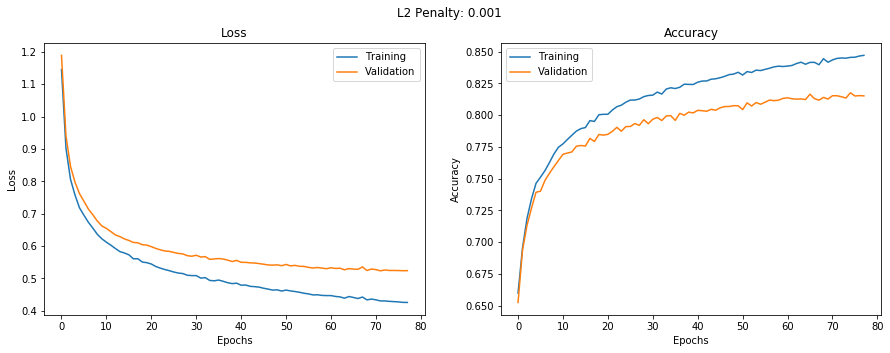

In [3]:
config["learning_rate"] = 0.0005
config["batch_size"] = 512
config["L2_penalty"] = 0.001
config["epochs"] = 121
config["early_stop_epoch"] = 5

# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test,  y_test  = load_data(path="./", mode="t10k")

indices = np.array(range(60000))
val_ind = indices[0:10000]
train_ind = indices[10000:60000]

# Create the model and train
model = Neuralnetwork(config)
plot_data = train(model, x_train[train_ind], y_train[train_ind], x_train[val_ind], y_train[val_ind], config, live_plot=False)
remodel = load_model(0)
test_acc = test(remodel, x_test, y_test)
_, test_loss = remodel(x_test, y_test)
print("Test Accuracy: {}, Test Loss: {}".format(test_acc, test_loss))

train_loss, val_loss, train_acc, val_acc = list(zip(*plot_data))
plot_title = "L2 Penalty: {}".format(config["L2_penalty"])
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()

config["early_stop_epoch"] = 5

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 Early stop on epoch 103
Best epoch: 97
Test Accuracy: 0.8133, Test Loss: 0.5402063174459277


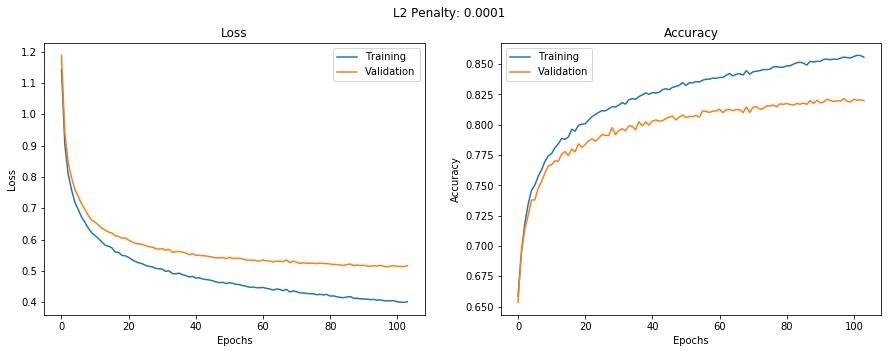

In [4]:
config["learning_rate"] = 0.0005
config["batch_size"] = 512
config["L2_penalty"] = 0.0001
config["epochs"] = 121
config["early_stop_epoch"] = 5

# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test,  y_test  = load_data(path="./", mode="t10k")

indices = np.array(range(60000))
val_ind = indices[0:10000]
train_ind = indices[10000:60000]

# Create the model and train
model = Neuralnetwork(config)
plot_data = train(model, x_train[train_ind], y_train[train_ind], x_train[val_ind], y_train[val_ind], config, live_plot=False)
remodel = load_model(0)
test_acc = test(remodel, x_test, y_test)
_, test_loss = remodel(x_test, y_test)
print("Test Accuracy: {}, Test Loss: {}".format(test_acc, test_loss))

train_loss, val_loss, train_acc, val_acc = list(zip(*plot_data))
plot_title = "L2 Penalty: {}".format(config["L2_penalty"])
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()
config["early_stop_epoch"] = 5

# Part E
 Use momentum gamma of 0.9, no weight decay, lr and epoch from part c
 Try sigmoid and ReLU

Plot training/valid loss and accuracy
Report test accuracy and lost
Comment on the change of performance. How do these activation functions compare to each other? What works best for your problem?

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 Early stop on epoch 128
Best epoch: 122
Test Accuracy: 0.8304, Test Loss: 0.48409077028467057


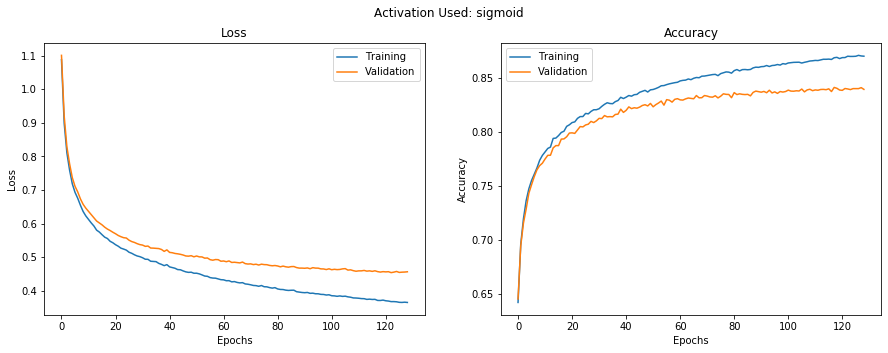

In [5]:
config["activation"] = "sigmoid"
config["epochs"] = 150
config["L2_penalty"] = 0
config["learning_rate"] = 0.0005
config["batch_size"] = 512


# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test,  y_test  = load_data(path="./", mode="t10k")

indices = np.array(range(60000))
val_ind = indices[0:10000]
train_ind = indices[10000:60000]

# Create the model and train
model = Neuralnetwork(config)
plot_data = train(model, x_train[train_ind], y_train[train_ind], x_train[val_ind], y_train[val_ind], config, live_plot=False)
remodel = load_model(0)
test_acc = test(remodel, x_test, y_test)
_, test_loss = remodel(x_test, y_test)
print("Test Accuracy: {}, Test Loss: {}".format(test_acc, test_loss))

train_loss, val_loss, train_acc, val_acc = list(zip(*plot_data))
plot_title = "Activation Used: {}".format(config["activation"])
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 Early stop on epoch 61
Best epoch: 50
Test Accuracy: 0.7961, Test Loss: 0.6202530975295026


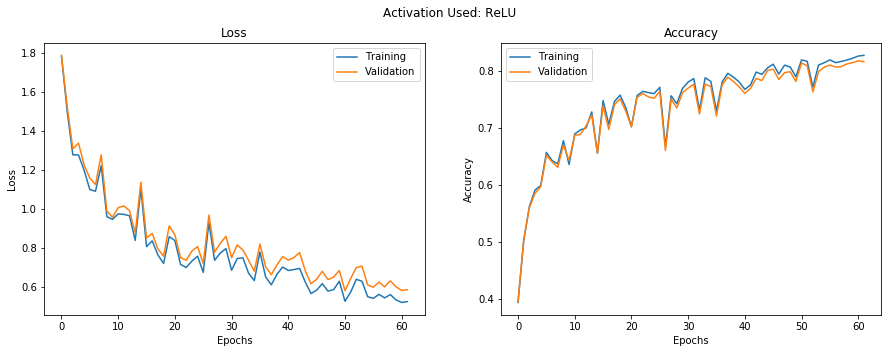

In [6]:
config["activation"] = "ReLU"
config["epochs"] = 100
config["L2_penalty"] = 0
config["learning_rate"] = 0.0005
config["batch_size"] = 512
config["early_stop_epoch"] = 10

# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test,  y_test  = load_data(path="./", mode="t10k")

indices = np.array(range(60000))
val_ind = indices[0:10000]
train_ind = indices[10000:60000]

# Create the model and train
model = Neuralnetwork(config)
plot_data = train(model, x_train[train_ind], y_train[train_ind], x_train[val_ind], y_train[val_ind], config, live_plot=False)
remodel = load_model(0)
test_acc = test(remodel, x_test, y_test)
_, test_loss = remodel(x_test, y_test)
print("Test Accuracy: {}, Test Loss: {}".format(test_acc, test_loss))

train_loss, val_loss, train_acc, val_acc = list(zip(*plot_data))
plot_title = "Activation Used: {}".format(config["activation"])
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()
    
config["early_stop_epoch"] = 5

# Part F
Use momentum gamma of 0.9, no weight decay, lr and epoch from part c

Try halving and doubling number of hidden units
Plot training/valid loss and accuracy
Report test accuracy and lost
How does performance change? Explain your results.

Try two hidden layers that uses two hidden layers of equal size and HAS APPROX SAME NUMBER OF PARAMETERS AS PREVIOUS HIDDEN OF 50 UNITS
Plot training/valid loss and accuracy
Report test accuracy and lost
How does performance change? Explain your results.

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 Early stop on epoch 101
Best epoch: 95
Test Accuracy: 0.807, Test Loss: 0.5626885814989097


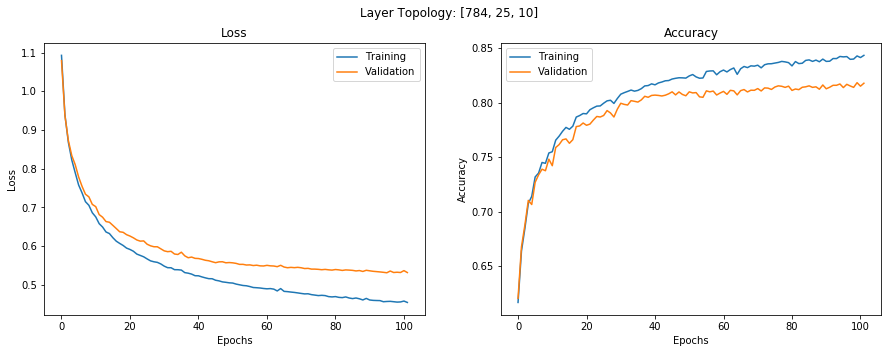

In [7]:
config["activation"] = "tanh"
config["epochs"] = 200
config["L2_penalty"] = 0
config["layer_specs"] = [784, 25, 10]
config["learning_rate"] = 0.0005
config["batch_size"] = 512
# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test,  y_test  = load_data(path="./", mode="t10k")

indices = np.array(range(60000))
val_ind = indices[0:10000]
train_ind = indices[10000:60000]

# Create the model and train
model = Neuralnetwork(config)
plot_data = train(model, x_train[train_ind], y_train[train_ind], x_train[val_ind], y_train[val_ind], config, live_plot=False)
remodel = load_model(0)
test_acc = test(remodel, x_test, y_test)
_, test_loss = remodel(x_test, y_test)
print("Test Accuracy: {}, Test Loss: {}".format(test_acc, test_loss))

train_loss, val_loss, train_acc, val_acc = list(zip(*plot_data))
plot_title = "Layer Topology: {}".format(config["layer_specs"])
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 Early stop on epoch 47
Best epoch: 41
Test Accuracy: 0.8085, Test Loss: 0.5635557286796259


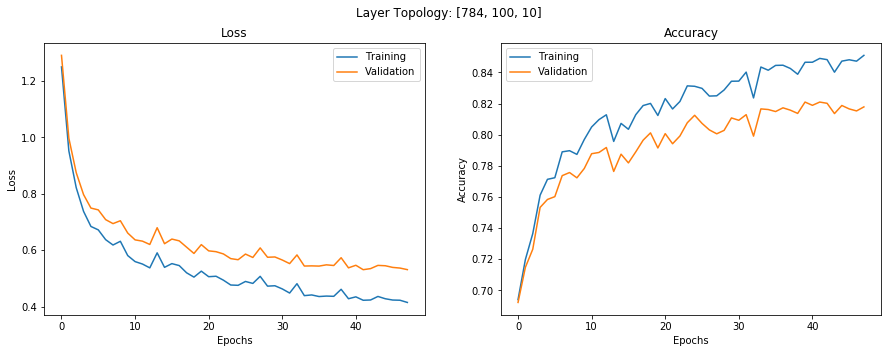

In [8]:
config["activation"] = "tanh"
config["epochs"] = 200
config["L2_penalty"] = 0
config["layer_specs"] = [784, 100, 10]
config["learning_rate"] = 0.0005
config["batch_size"] = 512
# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test,  y_test  = load_data(path="./", mode="t10k")

indices = np.array(range(60000))
val_ind = indices[0:10000]
train_ind = indices[10000:60000]

# Create the model and train
model = Neuralnetwork(config)
plot_data = train(model, x_train[train_ind], y_train[train_ind], x_train[val_ind], y_train[val_ind], config, live_plot=False)
remodel = load_model(0)
test_acc = test(remodel, x_test, y_test)
_, test_loss = remodel(x_test, y_test)
print("Test Accuracy: {}, Test Loss: {}".format(test_acc, test_loss))

train_loss, val_loss, train_acc, val_acc = list(zip(*plot_data))
plot_title = "Layer Topology: {}".format(config["layer_specs"])
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 Early stop on epoch 73
Best epoch: 67
Test Accuracy: 0.7943, Test Loss: 0.5899018394593644


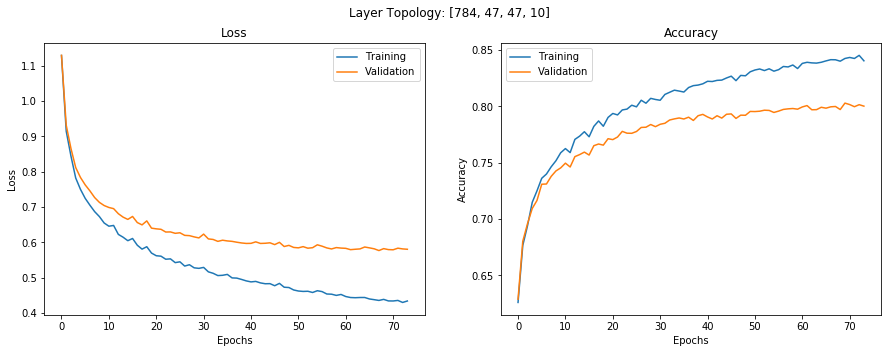

In [9]:
config["activation"] = "tanh"
config["epochs"] = 200
config["L2_penalty"] = 0
config["layer_specs"] = [784, 47, 47, 10]
config["learning_rate"] = 0.0005
config["batch_size"] = 512

# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test,  y_test  = load_data(path="./", mode="t10k")

indices = np.array(range(60000))
val_ind = indices[0:10000]
train_ind = indices[10000:60000]

# Create the model and train
model = Neuralnetwork(config)
plot_data = train(model, x_train[train_ind], y_train[train_ind], x_train[val_ind], y_train[val_ind], config, live_plot=False)
remodel = load_model(0)
test_acc = test(remodel, x_test, y_test)
_, test_loss = remodel(x_test, y_test)
print("Test Accuracy: {}, Test Loss: {}".format(test_acc, test_loss))

train_loss, val_loss, train_acc, val_acc = list(zip(*plot_data))
plot_title = "Layer Topology: {}".format(config["layer_specs"])
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 Early stop on epoch 139
Best epoch: 133
Test Accuracy: 0.8335, Test Loss: 0.483796793244585


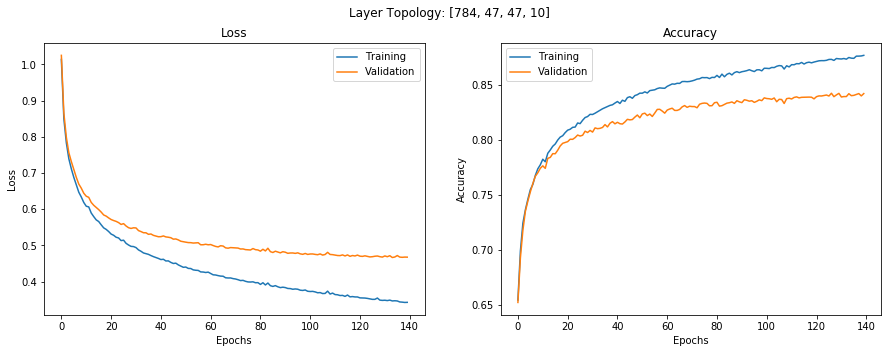

In [10]:
# BEST!?

config["activation"] = "sigmoid"
config["epochs"] = 200
config["L2_penalty"] = 0.001
config["layer_specs"] = [784, 47,47, 10]
config["learning_rate"] = 0.0005
config["batch_size"] = 512
# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test,  y_test  = load_data(path="./", mode="t10k")

indices = np.array(range(60000))
val_ind = indices[0:10000]
train_ind = indices[10000:60000]

# Create the model and train
model = Neuralnetwork(config)
plot_data = train(model, x_train[train_ind], y_train[train_ind], x_train[val_ind], y_train[val_ind], config, live_plot=False)
remodel = load_model(0)
test_acc = test(remodel, x_test, y_test)
_, test_loss = remodel(x_test, y_test)
print("Test Accuracy: {}, Test Loss: {}".format(test_acc, test_loss))

train_loss, val_loss, train_acc, val_acc = list(zip(*plot_data))
plot_title = "Layer Topology: {}".format(config["layer_specs"])
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 Early stop on epoch 128
Best epoch: 122
Test Accuracy: 0.8306, Test Loss: 0.4851423574195512


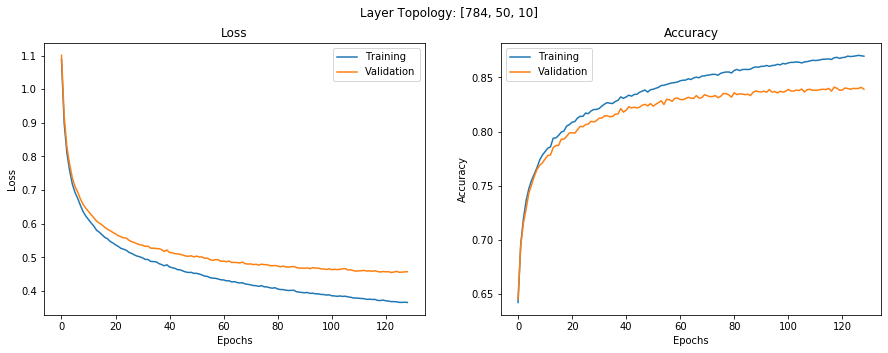

In [11]:
# BEST!?

config["activation"] = "sigmoid"
config["epochs"] = 200
config["L2_penalty"] = 0.001
config["layer_specs"] = [784, 50, 10]
config["learning_rate"] = 0.0005
config["batch_size"] = 512
# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test,  y_test  = load_data(path="./", mode="t10k")

indices = np.array(range(60000))
val_ind = indices[0:10000]
train_ind = indices[10000:60000]

# Create the model and train
model = Neuralnetwork(config)
plot_data = train(model, x_train[train_ind], y_train[train_ind], x_train[val_ind], y_train[val_ind], config, live_plot=False)
remodel = load_model(0)
test_acc = test(remodel, x_test, y_test)
_, test_loss = remodel(x_test, y_test)
print("Test Accuracy: {}, Test Loss: {}".format(test_acc, test_loss))

train_loss, val_loss, train_acc, val_acc = list(zip(*plot_data))
plot_title = "Layer Topology: {}".format(config["layer_specs"])
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()